In [1]:
import numpy as np
import pandas as pd

ratings_data = pd.read_csv(r"C:\Users\Abhishek\Desktop\DCU\Cloud Computing\Assignment 2\ratings_old.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [2]:
movie_names = pd.read_csv(r"C:\Users\Abhishek\Desktop\DCU\Cloud Computing\Assignment 2\movies_old.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movie_data = pd.merge(ratings_data, movie_names, on='movieId')

In [4]:
movie_data.tail()

,userId,movieId,rating,timestamp,title,genres
1048570,10472,184393,5.0,1518426759,The Criminal Excellency Fund (2018),Action|Comedy|Crime
1048571,10494,124544,5.0,1461152006,Perfume (2001),Comedy|Drama
1048572,10518,66025,1.0,1233955153,Go Go Tales (2007),Comedy|Drama
1048573,10518,99906,3.0,1358520547,Renoir (2012),Drama|Romance
1048574,10530,6925,4.0,1180226305,Sherlock Holmes in Washington (1943),Crime|Mystery


In [5]:
movie_data.groupby('title')['rating'].mean().head()

title
"Great Performances" Cats (1998)    2.375
#Horror (2015)                      1.000
#realityhigh (2017)                 4.000
$ (Dollars) (1971)                  3.000
$5 a Day (2008)                     1.750
Name: rating, dtype: float64

In [6]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Amal (2007)                                    5.0
Detective Conan: Crimson Love Letter (2017)    5.0
Kite (1998)                                    5.0
Kizumonogatari II: Passionate Blood (2016)     5.0
Shelter Island (2003)                          5.0
Name: rating, dtype: float64

In [7]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 3606
Shawshank Redemption, The (1994)    3582
Pulp Fiction (1994)                 3410
Silence of the Lambs, The (1991)    3244
Matrix, The (1999)                  3117
Name: rating, dtype: int64

In [8]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

In [9]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [10]:
ratings_mean_count.head()

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",2.375,8
#Horror (2015),1.000,1
#realityhigh (2017),4.000,1
$ (Dollars) (1971),3.000,1
$5 a Day (2008),1.750,2


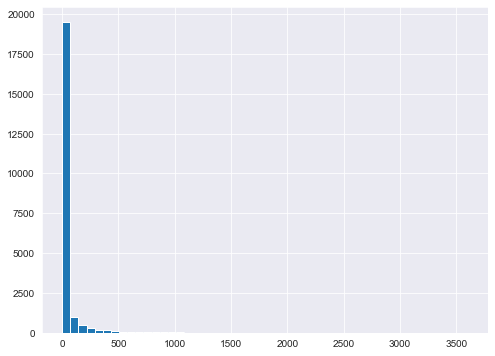

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

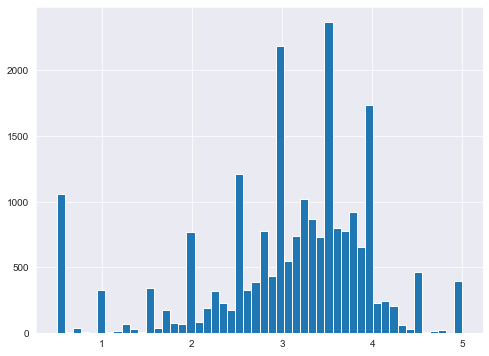

In [12]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

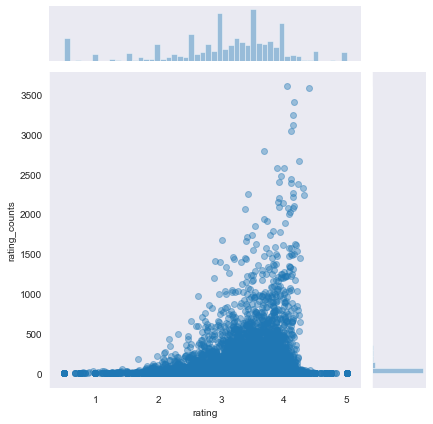

In [13]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [14]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')

In [15]:
user_movie_rating.head()

title,"""Great Performances"" Cats (1998)",#Horror (2015),#realityhigh (2017),$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Pimpernel' Smith (1941),...,Мартынко (1987),Мафия (2016),Никто не знает про секс (2006),Обезьянки и грабители (1985),Он вам не Димон (2017),Оно (1990),Сердца трех (1992),Юленька (2009),Я худею (2018),チェブラーシカ (2010)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
movie_name_ratings = user_movie_rating['Django Unchained (2012)']


In [17]:
movie_name_ratings.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Django Unchained (2012), dtype: float64

In [19]:
movies_like_movie_name = user_movie_rating.corrwith(movie_name_ratings)

corr_movie_name = pd.DataFrame(movies_like_movie_name, columns=['Correlation'])
corr_movie_name.dropna(inplace=True)
corr_movie_name.head()

,Correlation
title,
$9.99 (2008),1.00000
'71 (2014),0.32906
'Hellboy': The Seeds of Creation (2004),1.00000
'R Xmas (2001),1.00000
'Round Midnight (1986),-1.00000


In [20]:
corr_movie_name.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
$9.99 (2008),1.0
My Girl 2 (1994),1.0
Nazarin (Nazarín) (1959),1.0
Navajo Joe (1966),1.0
Narcopolis (2014),1.0
"Naked City, The (1948)",1.0
"Myth, The (San wa) (2005)",1.0
Mysterious Island (1961),1.0
Batman Unmasked: The Psychology of the Dark Knight (2008),1.0


In [21]:
corr_movie_name = corr_movie_name.join(ratings_mean_count['rating_counts'])
corr_movie_name.head()

,Correlation,rating_counts
title,,
$9.99 (2008),1.00000,2
'71 (2014),0.32906,22
'Hellboy': The Seeds of Creation (2004),1.00000,5
'R Xmas (2001),1.00000,2
'Round Midnight (1986),-1.00000,5


In [22]:
corr_movie_name[corr_movie_name ['rating_counts']>50].sort_values('Correlation', ascending=False).head(200).to_csv(r'C:\Users\Abhishek\Desktop\DCU\output.csv')
                                                                                                        